In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
df=pd.read_csv('houseprice.csv')

In [139]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [140]:
df.shape

(545, 13)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [142]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [143]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

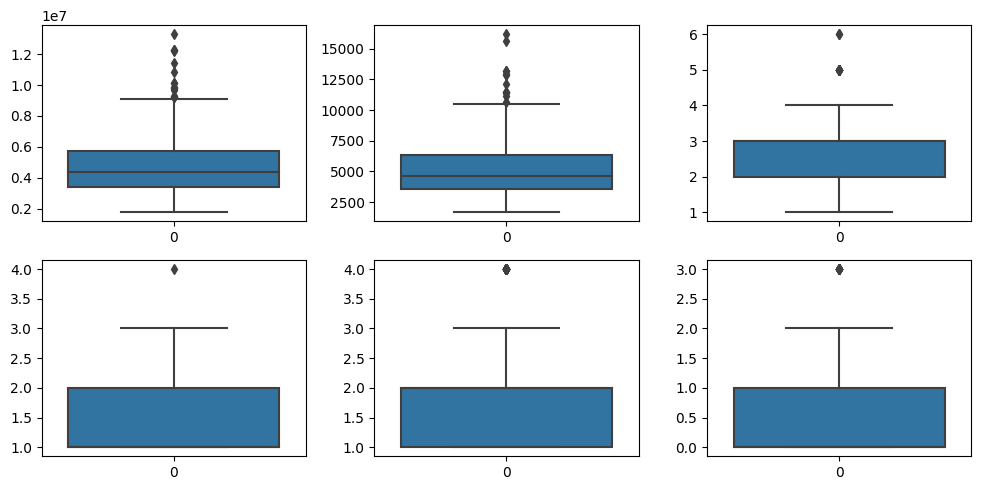

In [144]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])
plt.tight_layout()

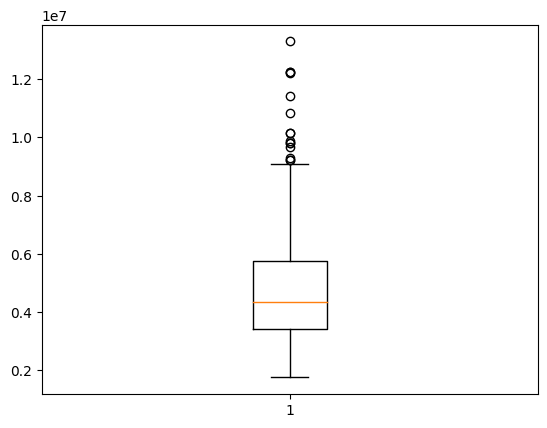

In [145]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

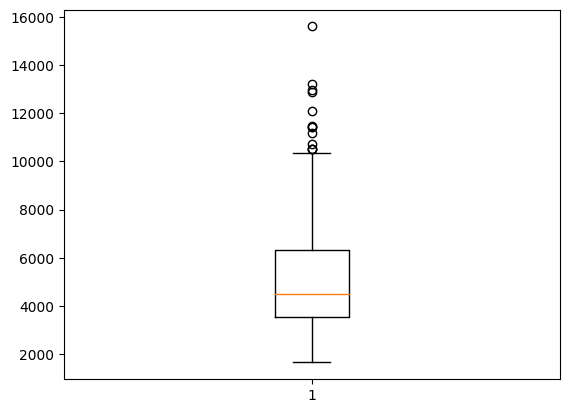

In [146]:
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

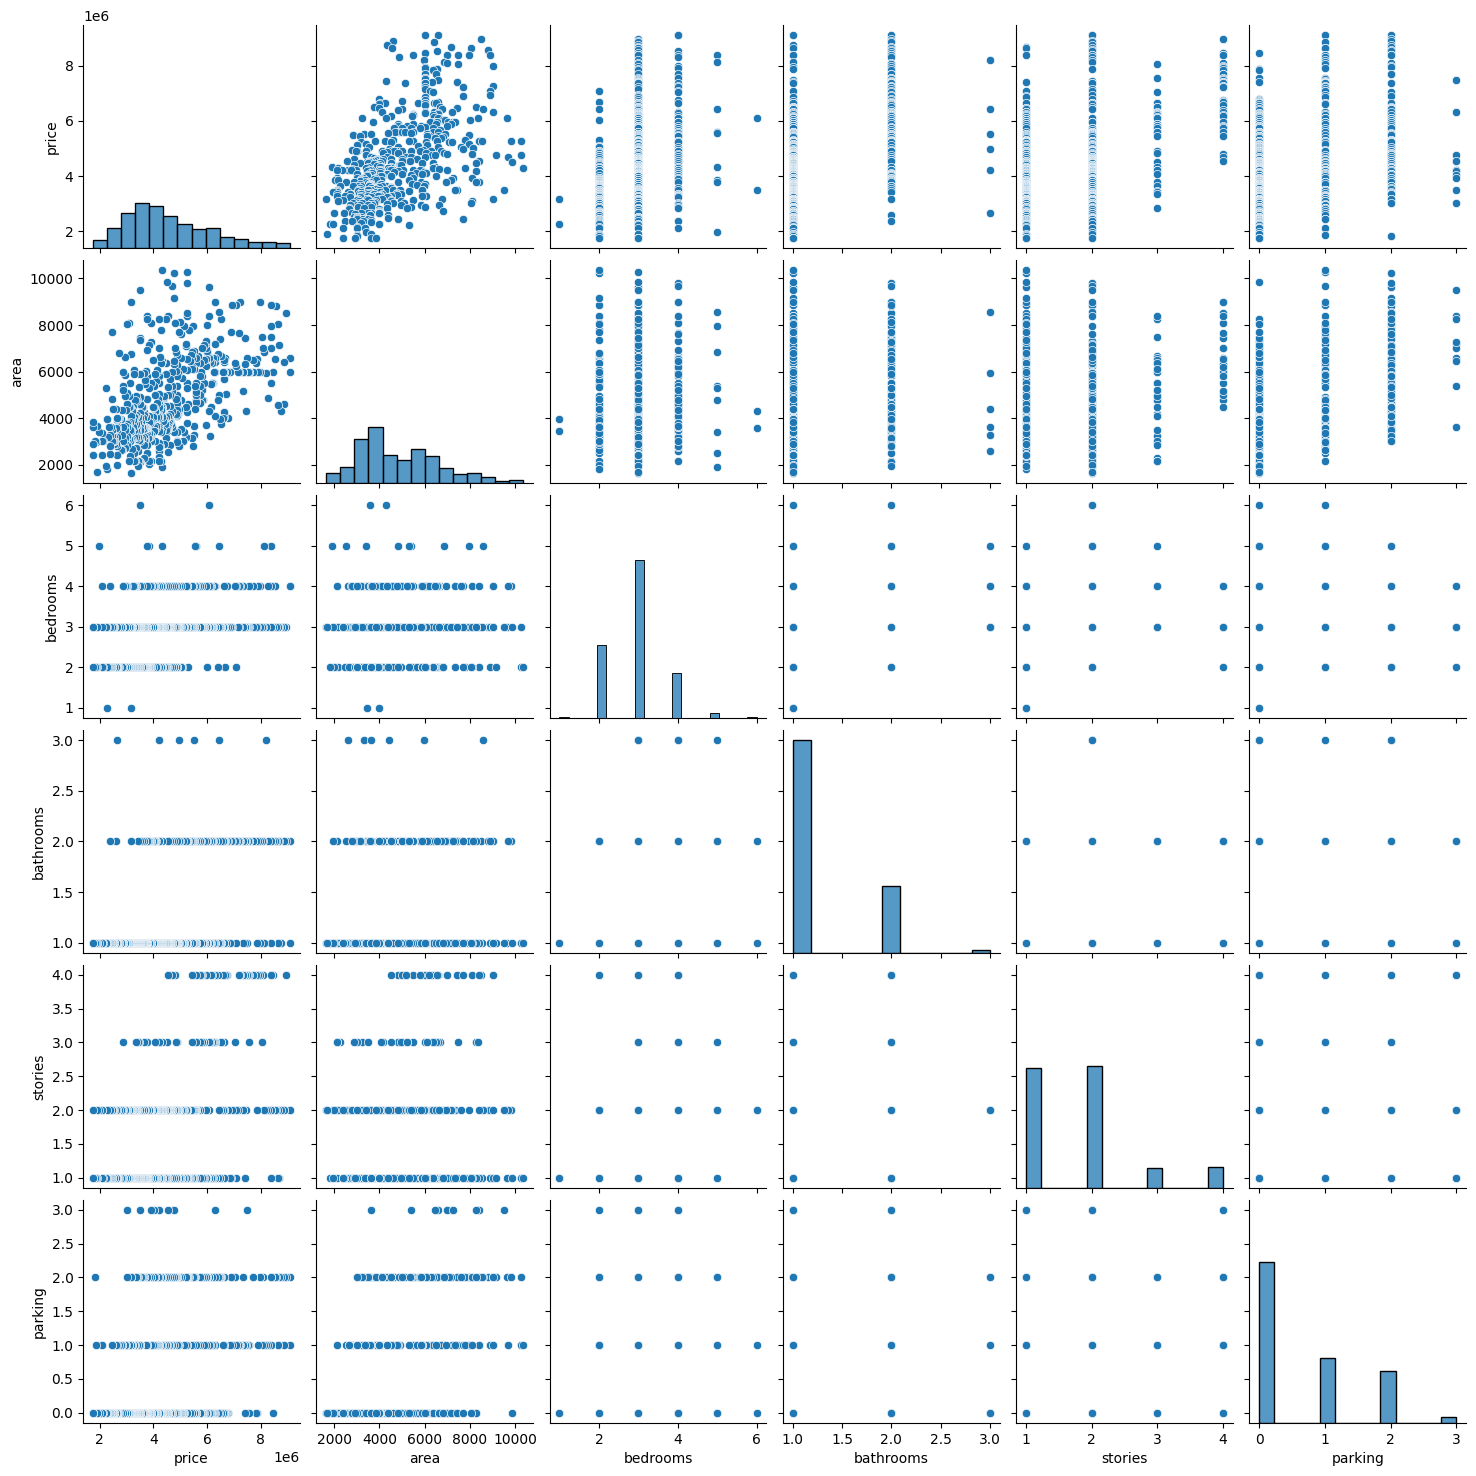

In [147]:
sns.pairplot(df)
plt.show()

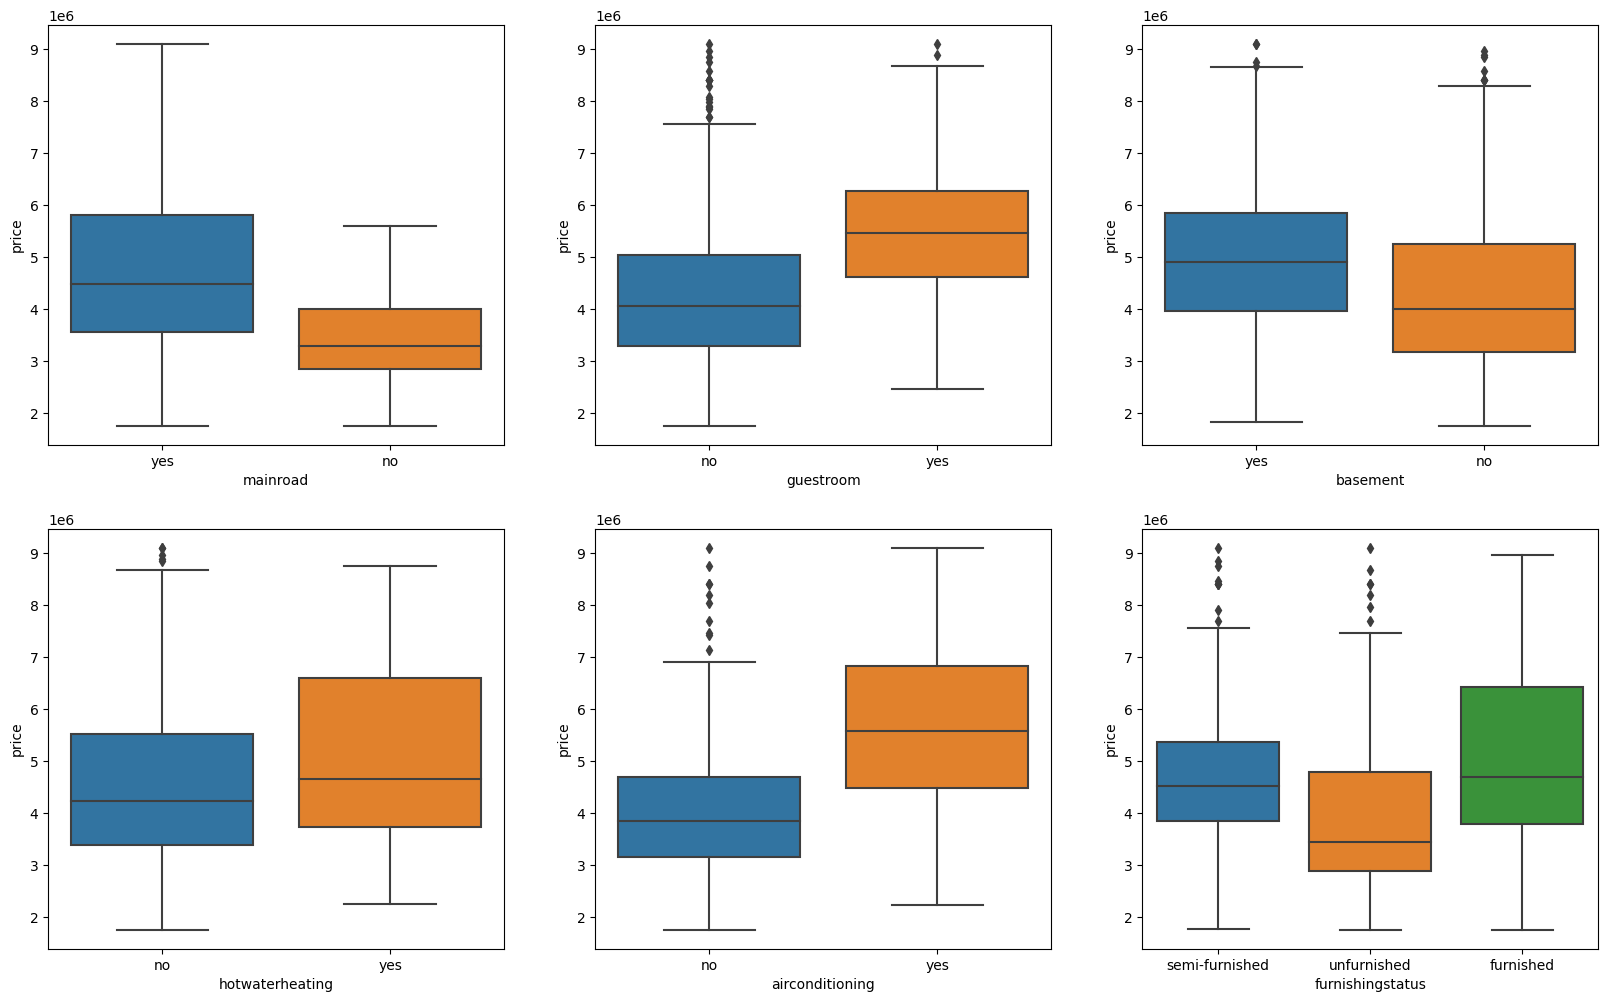

In [148]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

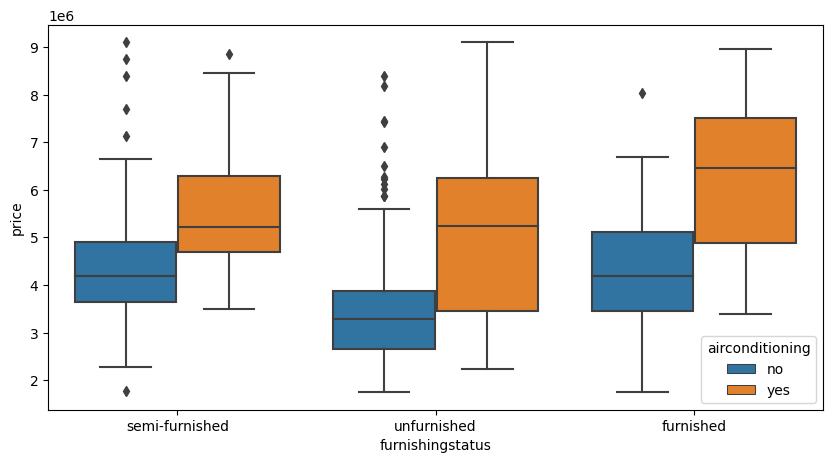

In [149]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)
plt.show()

In [150]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[varlist] = df[varlist].apply(lambda x: le.fit_transform(x))

In [151]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [152]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [153]:
df = pd.concat([df, status], axis = 1)

In [154]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [155]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [156]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


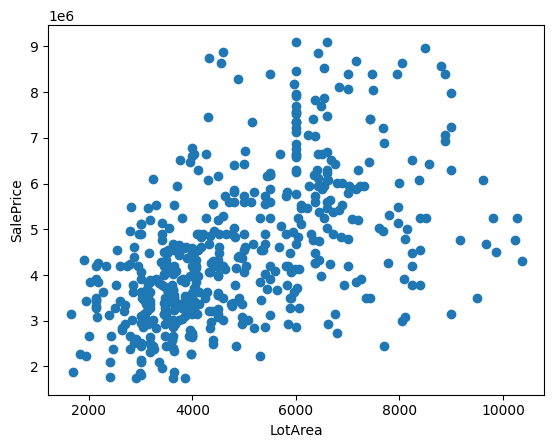

In [157]:
plt.scatter(df['area'], df['price'])
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [159]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df[num_vars] = sc.fit_transform(df[num_vars])

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 15 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            517 non-null    float64
 1   area             517 non-null    float64
 2   bedrooms         517 non-null    float64
 3   bathrooms        517 non-null    float64
 4   stories          517 non-null    float64
 5   mainroad         517 non-null    int32  
 6   guestroom        517 non-null    int32  
 7   basement         517 non-null    int32  
 8   hotwaterheating  517 non-null    int32  
 9   airconditioning  517 non-null    int32  
 10  parking          517 non-null    float64
 11  prefarea         517 non-null    int32  
 12  semi-furnished   517 non-null    uint8  
 13  unfurnished      517 non-null    uint8  
dtypes: float64(6), int32(6), uint8(2)
memory usage: 41.4 KB


In [161]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,517.0,-3.298458e-16,1.000969,-1.769223,-0.736764,-0.209550,0.603237,2.843893
area,517.0,1.099486e-16,1.000969,-1.822895,-0.770827,-0.219476,0.652559,3.077379
bedrooms,517.0,2.748715e-16,1.000969,-2.656624,-1.288621,0.079381,0.079381,4.183389
bathrooms,517.0,8.246144e-17,1.000969,-0.561652,-0.561652,-0.561652,-0.561652,3.740188
stories,517.0,-1.099486e-16,1.000969,-0.919714,-0.919714,0.237201,0.237201,2.551031
mainroad,517.0,8.510638e-01,0.356370,0.000000,1.000000,1.000000,1.000000,1.000000
guestroom,517.0,1.779497e-01,0.382841,0.000000,0.000000,0.000000,0.000000,1.000000
basement,517.0,3.462282e-01,0.476228,0.000000,0.000000,0.000000,1.000000,1.000000
hotwaterheating,517.0,4.255319e-02,0.202043,0.000000,0.000000,0.000000,0.000000,1.000000
airconditioning,517.0,3.075435e-01,0.461923,0.000000,0.000000,0.000000,1.000000,1.000000


<AxesSubplot: >

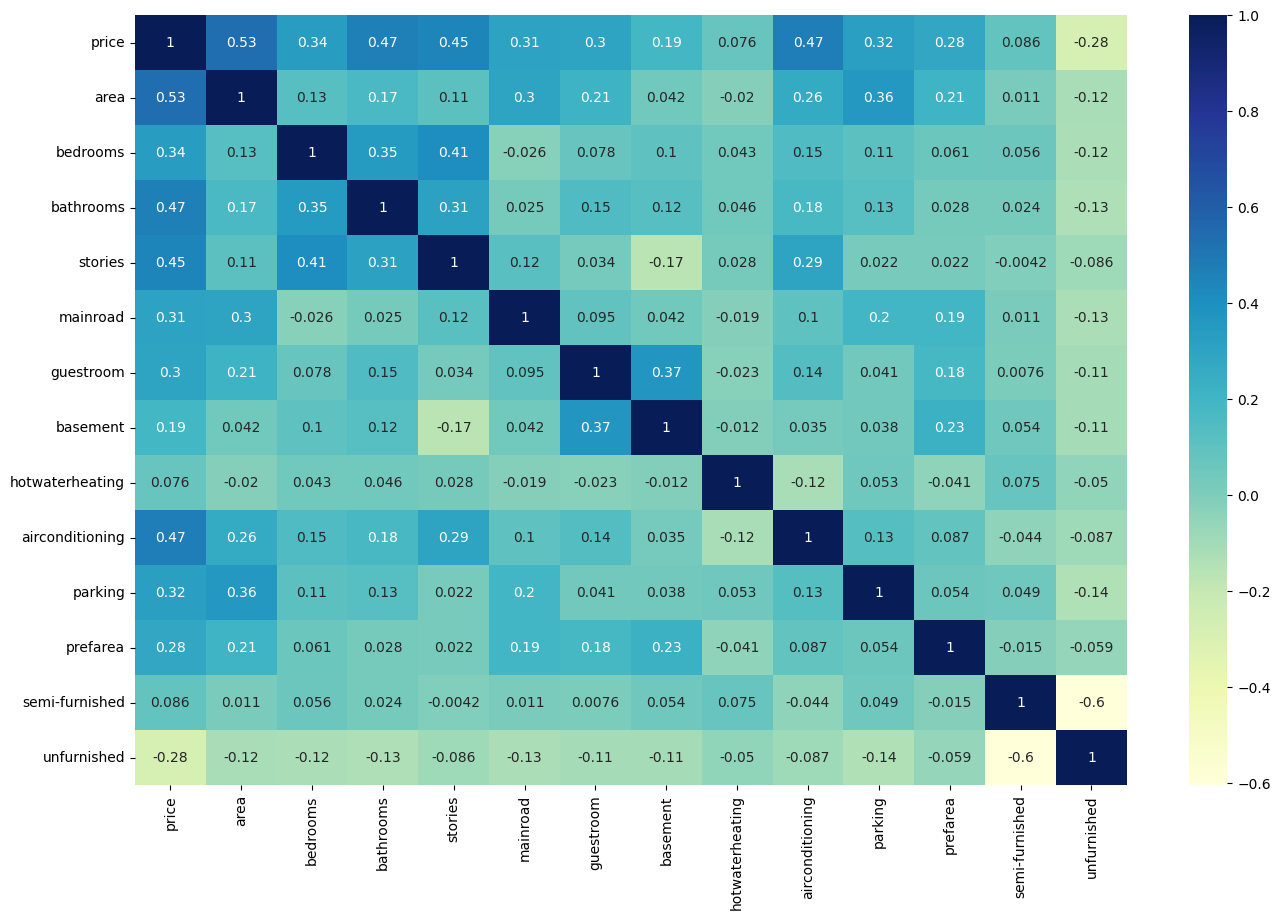

In [162]:
plt.figure(figsize = (16, 10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap='YlGnBu')

In [163]:
y = df['price']
x = df.drop('price',axis=1)

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [165]:
regr1 = LinearRegression()

In [166]:
regr1.fit(x_train, y_train)
print(regr1.score(x_test, y_test))

0.662460811689279


In [167]:
y_pred = regr1.predict(x_test)

In [168]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.44315813578372215
MSE: 0.37200369397090066
RMSE: 0.6099210555235003


In [175]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df['area'].values.reshape(-1,1), df['price'].values.reshape(-1,1))
pred=lin_reg.predict(x_test['area'].values.reshape(-1,1))
print( "Predicted values ", np.round(pred[:5], 2 )) 
print( "Real values      ", df['price'].values.reshape(-1,1)[:5] )
print(lin_reg.intercept_, lin_reg.coef_)

Predicted values  [[-0.82]
 [ 0.35]
 [-0.52]
 [ 0.33]
 [-0.06]]
Real values       [[2.84389325]
 [2.84389325]
 [2.75602437]
 [2.71208993]
 [2.69012271]]
[-3.88468764e-16] [[0.53318564]]


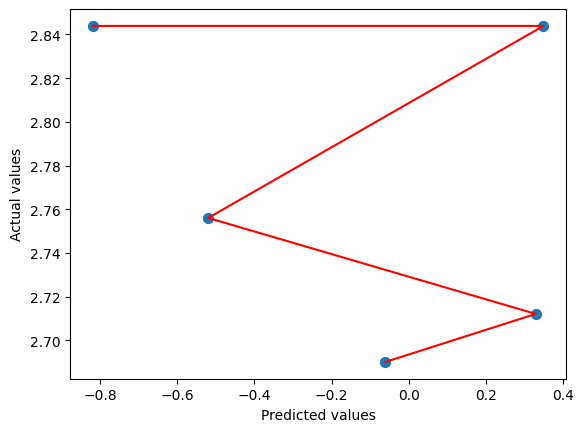

In [181]:
import matplotlib.pyplot as plt

plt.scatter(np.round(pred[:5], 2), df['price'].values.reshape(-1,1)[:5], s=50)
plt.plot(np.round(pred[:5], 2), df['price'].values.reshape(-1,1)[:5], color ='r')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

Text(0, 0.5, 'y_pred')

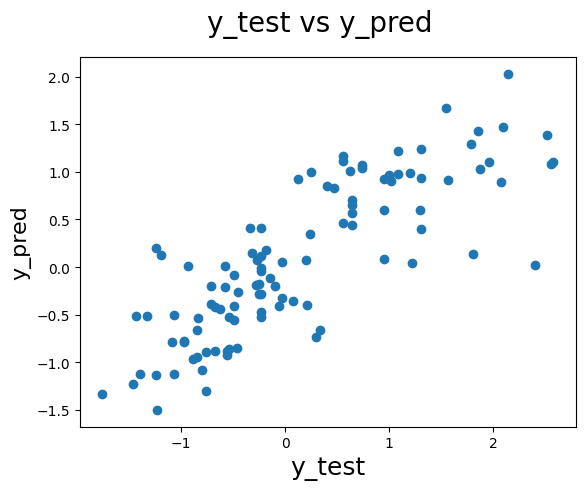

In [189]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

In [185]:
y_train_price = regr1.predict(x_train)

C:\Users\gs180\AppData\Local\Temp\ipykernel_16840\2341465611.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

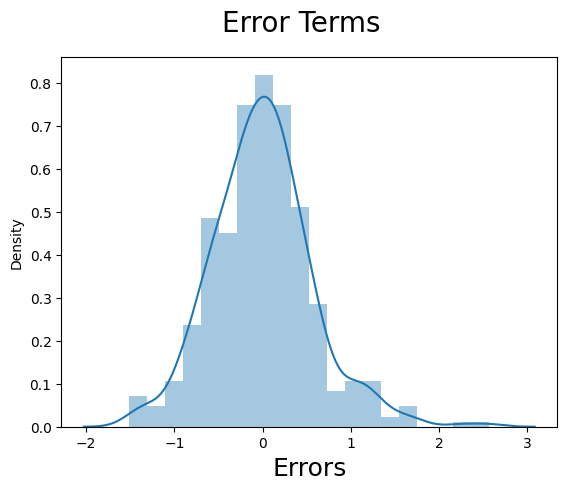

In [186]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

In [187]:
res = (y_train_price - y_train)

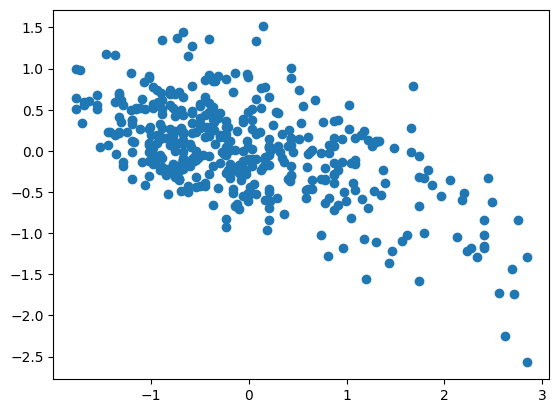

In [188]:
plt.scatter(y_train,res)
plt.show()